#重回帰（特徴量：ALL）の学習→予測→評価


In [ ]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install pandas==1.5.3
# !pip install numpy==1.22.4
# !pip install matplotlib==3.7.1
# !pip install scikit-learn==1.2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# バージョンの確認
import matplotlib
import sklearn
print(pd.__version__) 
print(np.__version__)
print(matplotlib.__version__)
print(sklearn.__version__) 

1.5.3
1.22.4
3.7.1
1.2.2


In [ ]:
# データセットの読み込み
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# 特徴量と目的変数の設定
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [ ]:
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)
print('X_trainの形状：', X_train.shape, ' y_trainの形状：', y_train.shape, ' X_testの形状：', X_test.shape, ' y_testの形状：', y_test.shape)

X_trainの形状： (404, 13)  y_trainの形状： (404,)  X_testの形状： (102, 13)  y_testの形状： (102,)


In [ ]:
# 特徴量の標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # 変換器の作成
num_cols =  X.columns[0:13] # 全て数値型の特徴量なので全て取得
scaler.fit(X_train[num_cols]) # 学習データでの標準化パラメータの計算
X_train[num_cols] = scaler.transform(X_train[num_cols]) # 学習データの変換
X_test[num_cols] = scaler.transform(X_test[num_cols]) # テストデータの変換

display(X_train.iloc[:2]) # 標準化された学習データの特徴量

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,-0.372574,-0.499608,-0.704925,3.664502,-0.424879,0.935678,0.693669,-0.437218,-0.162242,-0.561656,-0.484638,0.371691,-0.411000
71,-0.397099,-0.499608,-0.044878,-0.272888,-1.241859,-0.491181,-1.835528,0.730055,-0.624648,-0.573376,0.336491,0.205012,-0.387681


In [ ]:
# モデルの学習
from sklearn.linear_model import LinearRegression

model = LinearRegression() # 線形回帰モデル
model.fit(X_train, y_train)
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
# テストデータの予測と評価
y_test_pred = model.predict(X_test)
print('RMSE test: %.2f' % (mean_squared_error(y_test, y_test_pred) ** 0.5))

RMSE test: 5.78


In [ ]:
# テストデータの目的関数の統計情報
y_test.describe()

count    102.000000
mean      22.219608
std        9.068333
min        5.600000
25%       17.100000
50%       20.550000
75%       23.875000
max       50.000000
Name: MEDV, dtype: float64

#予測値の解釈

In [ ]:
# パラメータ
print('回帰係数 w = [w1, w2, … , w13]:', model.coef_)
print('定数項 w0:', model.intercept_) 

回帰係数 w = [w1, w2, … , w13]: [-0.97082019  1.05714873  0.03831099  0.59450642 -1.8551476   2.57321942
 -0.08761547 -2.88094259  2.11224542 -1.87533131 -2.29276735  0.71817947
 -3.59245482]
定数項 w0: 22.611881188118804


In [ ]:
# 特徴量の列テキスト表示
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

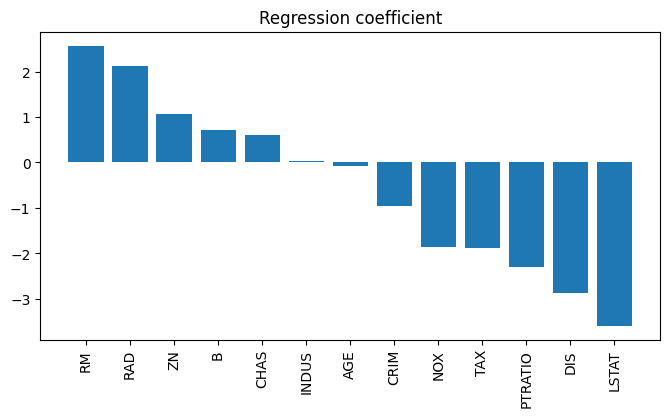

In [ ]:
# 回帰係数の可視化
importances = model.coef_ # 回帰係数
indices = np.argsort(importances)[::-1] # 回帰係数を降順にソート

plt.figure(figsize=(8, 4)) #プロットのサイズ指定
plt.title('Regression coefficient') # プロットのタイトルを作成
plt.bar(range(X.shape[1]), importances[indices]) # 棒グラフを追加
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90) # X軸に特徴量の名前を追加
plt.show() # プロットを表示

In [ ]:
# 予測値のリスト
y_test_pred

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254,
       19.2834443 , 20.49647539, 21.36099298, 18.8967118 , 19.9280658 ,
        5.12703513, 16.3867396 , 17.07776485,  5.59375659, 39.99636726,
       32.49654668, 22.45798809, 36.85192327, 30.86401089, 23.15140009,
       24.77495789, 24.67187756, 20.59543752, 30.35369168, 22.41940736,
       10.23266565, 17.64816865, 18.27419652, 35.53362541, 20.96084724,
       18.30413012, 17.79262072, 19.96561663, 24.06127231, 29.10204874,
       19.27774123, 11.15536648, 24.57560579, 17.5862644 , 15.49454112,
       26.20577527, 20.86304693, 22.31460516, 15.60710156, 23.00363104,
       25.17247952, 20.11459464, 22.90256276, 10.0380507 , 24.28515123,
       20.94127711, 17.35258791, 24.52235405, 29.95143046, 13.42695877,
       21.72673066, 20.7897053 , 15.49668805, 13.98982601, 22.18377874,
       17.73047814, 21.58869165, 32.90522136, 31.11235671, 17.73252635,
       32.76358681, 18.7124637 , 19.78693475, 19.02958927, 22.89

In [ ]:
# 15件目の予測値
y_test_pred[14]

39.99636726102575

In [ ]:
# 15件目の特徴量
print('15件目の特徴量 X = [x1, x2, … , x13]:', X_test.values[14]) # pandasをnumpyに変換

15件目の特徴量 X = [x1, x2, … , x13]: [-1.91016247e-01 -4.99607632e-01  1.21078669e+00  3.66450153e+00
  4.26866547e-01  2.16220049e+00  1.03920698e+00 -8.32308117e-01
 -5.09046341e-01  9.13828105e-04 -1.71633159e+00  3.48089081e-01
 -1.47958855e+00]


In [ ]:
# 15件目予測値の検証
# y = w * X + w0
np.sum(model.coef_ * X_test.values[14]) + model.intercept_

39.99636726102575